### Import

In [52]:
import networkx as nx
from node2vec import Node2Vec
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, accuracy_score, f1_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
months = ['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30']
graphs = []

for month in months:
    with open(f'../data/graphs/graph_{month}.pkl', 'rb') as f:
        g = pickle.load(f)
        graphs.append(g)
        print(f'For {month}: {g.edges}')

For 2015-01-31: [('AFG', 'PAK'), ('AFG', 'USA'), ('AFR', 'BDI'), ('AFR', 'DJI'), ('AFR', 'NGA'), ('AFR', 'SDN'), ('AFR', 'SOM'), ('AFR', 'USA'), ('AFR', 'ZAF'), ('ARE', 'AUS'), ('ARE', 'BHR'), ('ARM', 'BGR'), ('AUS', 'USA'), ('BFA', 'CIV'), ('BGD', 'IND'), ('BGD', 'USA'), ('BGR', 'FRA'), ('BLR', 'USA'), ('BLZ', 'ESP'), ('BLZ', 'USA'), ('BRA', 'IDN'), ('CAN', 'CHN'), ('CAN', 'SAU'), ('CAN', 'SEA'), ('CAN', 'UKR'), ('CAN', 'USA'), ('CHE', 'SGP'), ('CHE', 'USA'), ('CHL', 'USA'), ('CHN', 'CMR'), ('CHN', 'COL'), ('CHN', 'EGY'), ('CHN', 'JPN'), ('CHN', 'KOR'), ('CHN', 'PAK'), ('CHN', 'RUS'), ('CHN', 'SEA'), ('CHN', 'TWN'), ('CHN', 'USA'), ('COD', 'COG'), ('COD', 'USA'), ('COK', 'USA'), ('COL', 'USA'), ('CUB', 'FRA'), ('CUB', 'NMR'), ('CUB', 'USA'), ('CUB', 'ZAF'), ('DEU', 'EUR'), ('DEU', 'MDV'), ('DEU', 'POL'), ('DEU', 'RUS'), ('DEU', 'SGP'), ('DEU', 'SYR'), ('DEU', 'USA'), ('ECU', 'SWE'), ('EGY', 'GMB'), ('EGY', 'MYS'), ('EGY', 'USA'), ('ERI', 'ISR'), ('ESP', 'KOR'), ('ESP', 'USA'), ('ESP',

In [3]:
graphs

In [4]:
january_node2vec = Node2Vec(graphs[0], dimensions=64, walk_length=30, num_walks=100, workers=4)
january_model = january_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

In [5]:
february_node2vec = Node2Vec(graphs[1], dimensions=64, walk_length=30, num_walks=100, workers=4)
february_model = february_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

In [6]:
march_node2vec = Node2Vec(graphs[2], dimensions=64, walk_length=30, num_walks=100, workers=4)
march_model = march_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

In [7]:
april_node2vec = Node2Vec(graphs[3], dimensions=64, walk_length=30, num_walks=100, workers=4)
april_model = april_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

In [8]:
print(len(graphs[0].nodes) == len(graphs[1].nodes) == len(graphs[2].nodes) == len(graphs[3].nodes))

True


In [9]:
ser1 = pd.Series([n for n in graphs[0].nodes])
ser2 = pd.Series([n for n in graphs[1].nodes])
ser3 = pd.Series([n for n in graphs[2].nodes])
ser4 = pd.Series([n for n in graphs[3].nodes])
intersection_set = set(ser1).intersection(set(ser2)).intersection(set(ser3)).intersection(set(ser4))

In [10]:
intersection_set

{'ABW',
 'AFG',
 'AFR',
 'AGO',
 'AIA',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'ASA',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BLR',
 'BLZ',
 'BMU',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CAS',
 'CAU',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COK',
 'COL',
 'COM',
 'CPV',
 'CRB',
 'CRI',
 'CUB',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'EAF',
 'ECU',
 'EGY',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'EUR',
 'FIN',
 'FJI',
 'FRA',
 'FSM',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRD',
 'GTM',
 'GUY',
 'HKG',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KIR',
 'KNA',
 'KOR',
 'KWT',
 'LAM',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LCA',
 'LIE',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MAR',
 'MCO',
 'MDA',
 'MDG',
 'MDV',


In [11]:
avg_vectors = dict()
for node in graphs[3].nodes:
    avg_vector = []
    for i in range(64):
        avg_vector.append((january_model.wv[node][i] + february_model.wv[node][i] + march_model.wv[node][i] + april_model.wv[node][i]) / 4)
    avg_vectors[node] = avg_vector

In [12]:
graphs[0].nodes


NodeView(('ABW', 'AFG', 'AFR', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASA', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CAS', 'CAU', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRB', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAF', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'EUR', 'FIN', 'FJI', 'FRA', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAM', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEA', 'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAF', 'NAM', 'NER', 'NG

In [13]:
january_model.wv['USA']

array([ 0.00188894, -0.5916116 , -0.10161779, -0.12629662, -0.13158944,
       -0.22204582,  0.17944123, -0.3207261 , -0.3041293 , -0.02289319,
        0.11267736, -0.2593854 , -0.7004651 ,  0.04915887,  0.02957406,
       -0.04405943, -0.11279605, -0.11866766, -0.00318052,  0.5405816 ,
        0.41274416, -0.30635607,  0.30560046, -0.16684233,  0.31524572,
        0.31895193, -0.4358461 ,  0.13249888, -0.03740069,  0.13500151,
        0.12144482, -0.1276032 , -0.05458279,  0.19522592, -0.01520898,
       -0.16060439, -0.30981722, -0.10670792, -0.1408779 ,  0.07952851,
        0.2091666 ,  0.17261544, -0.0049233 , -0.15657367, -0.17540112,
       -0.31825352,  0.39233762, -0.29615292,  0.28735685, -0.3008423 ,
       -0.01271749, -0.08375511,  0.38651055,  0.5560301 ,  0.3002528 ,
       -0.11277052, -0.17739822, -0.11119227, -0.14753222,  0.39434162,
        0.00401885, -0.6532566 ,  0.10032286,  0.18250902], dtype=float32)

In [14]:
len(avg_vectors['USA'])

64

### Scalar product of two vectors for link prediction

In [15]:
dot_products = dict()
for node1 in avg_vectors:
    for node2 in avg_vectors:
        if node1 != node2:
            vector1 = np.array(avg_vectors[node1])
            vector2 = np.array(avg_vectors[node2])
            n_sorted = sorted([node1, node2])
            dot_products[f'{n_sorted[0]}-{n_sorted[1]}'] = np.dot(vector1, vector2)

In [16]:
dot_products

{'ABW-AFG': -0.007984872619063617,
 'ABW-AFR': -0.009809211954560085,
 'ABW-AGO': -0.009988612363709891,
 'ABW-AIA': -0.0009305630979244163,
 'ABW-ALB': -0.0011531928499083732,
 'ABW-AND': 0.0008076649908465175,
 'ABW-ARE': -0.010630687254405509,
 'ABW-ARG': -0.001551100323979068,
 'ABW-ARM': -0.015547214442077921,
 'ABW-ASA': -0.0009752486818097143,
 'ABW-ATG': -0.0003557440620150002,
 'ABW-AUS': -0.007682610291646489,
 'ABW-AUT': -0.0033644119232091275,
 'ABW-AZE': 0.001664660089264811,
 'ABW-BDI': -0.012106088995943348,
 'ABW-BEL': -0.00024838473490190575,
 'ABW-BEN': 0.003702379403089662,
 'ABW-BFA': -0.008992891999390627,
 'ABW-BGD': -0.008753400104766487,
 'ABW-BGR': -0.013208066773905224,
 'ABW-BHR': -0.010201466303229526,
 'ABW-BHS': 0.0061199169640639385,
 'ABW-BLR': -0.0070398355636964415,
 'ABW-BLZ': 0.001150502730883521,
 'ABW-BMU': -0.002803830813447666,
 'ABW-BOL': 0.0034743982402049363,
 'ABW-BRA': -0.0009717369281434579,
 'ABW-BRB': -0.00011847194574637031,
 'ABW-BRN': 

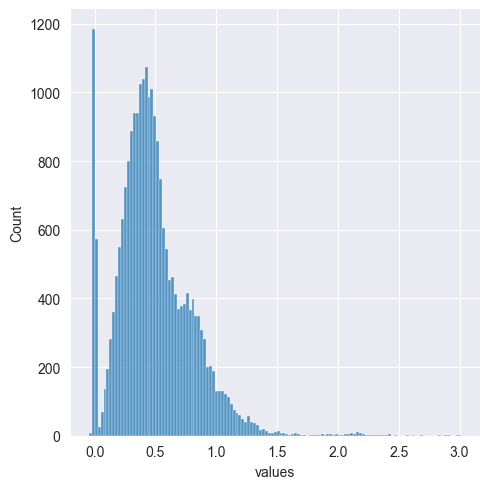

In [17]:
sns.displot(pd.DataFrame({'values':dot_products.values()}), x='values')

### Testing with different values of threshold

In [18]:
with open(f'../data/graphs/graph_2015-05-31.pkl', 'rb') as f:
        g = pickle.load(f)
        graphs.append(g)
        print(g.edges(data=True))

[('ABW', 'NLD', {'weight': 0.32994957983193246}), ('ABW', 'USA', {'weight': 5.517460317460318}), ('AFG', 'ARE', {'weight': -7.074291938997822}), ('AFG', 'AUS', {'weight': -2.72696614925925}), ('AFG', 'BRA', {'weight': -7.4195652173913045}), ('AFG', 'CAN', {'weight': 0.3140187736037181}), ('AFG', 'CAS', {'weight': 5.007946154621764}), ('AFG', 'CHN', {'weight': 1.4252879298751775}), ('AFG', 'DEU', {'weight': 2.729558020672221}), ('AFG', 'EGY', {'weight': -1.7264969559745413}), ('AFG', 'EUR', {'weight': -5.204718808983901}), ('AFG', 'FRA', {'weight': -2.489670234468934}), ('AFG', 'GBR', {'weight': -5.47716092757292}), ('AFG', 'HRV', {'weight': 1.611537308042588}), ('AFG', 'IDN', {'weight': 0.38000000000000006}), ('AFG', 'IND', {'weight': 1.3917199017199018}), ('AFG', 'IRN', {'weight': 0.08018590996540487}), ('AFG', 'ITA', {'weight': 1.251977401129944}), ('AFG', 'JOR', {'weight': 1.664864864864866}), ('AFG', 'JPN', {'weight': -8.0}), ('AFG', 'KAZ', {'weight': 1.2743687280737526}), ('AFG', 

In [25]:
actual_and_predicted_values = dict()
for edge in g.edges(data=True):
    node1, node2 = edge[0], edge[1]
    n_sorted = sorted([node1, node2])
    e = f'{n_sorted[0]}-{n_sorted[1]}'
    if e in dot_products:
        # threshold = 0.1
        actual_and_predicted_values[e] = (1 if edge[2]['weight'] >= 0 else 0, dot_products[e])

In [27]:
actual = [el[0] for el in actual_and_predicted_values.values()]
predicted = [el[1] for el in actual_and_predicted_values.values()]
'''recall = recall_score(actual, predicted)
acc = accuracy_score(actual, predicted)
print('Recall:', recall, 'Accuracy:', acc)'''

"recall = recall_score(actual, predicted)\nacc = accuracy_score(actual, predicted)\nprint('Recall:', recall, 'Accuracy:', acc)"

In [21]:
print(len(actual))

2467


In [22]:
print(len([el for el in actual if el == 0]))
print(len([el for el in actual if el == 1]))


603
1864


In [23]:
print(len([el for el in predicted if el == 0]))
print(len([el for el in predicted if el == 1]))

4
2463


In [28]:
X = predicted
y = actual
len(X) == len(y)
    

True

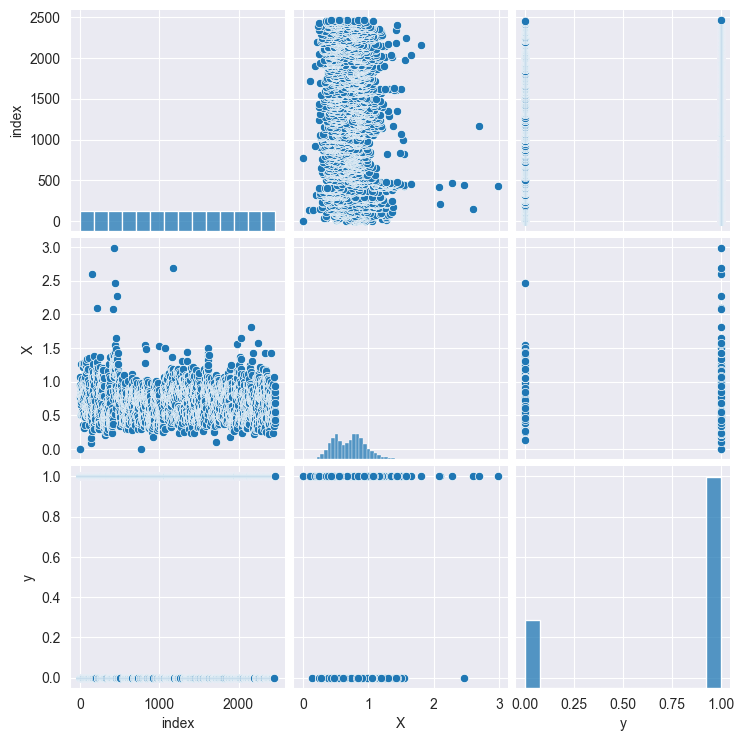

In [39]:
data = pd.DataFrame({'X': X, 'y': y}).reset_index()
sns.pairplot(data)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'], test_size=0.3, random_state=42)

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7773279352226721


In [51]:
print('Recall', recall_score(y_test, predictions))

Recall 1.0


In [53]:
print('F1-score', f1_score(y_test, predictions))

F1-score 0.8747152619589977
